# Sign Language Detection

In [1]:
!pip install opencv-python mediapipe
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


In [3]:
#Keypoints using mp holistics

mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [8]:
draw_landmarks(frame, results) 

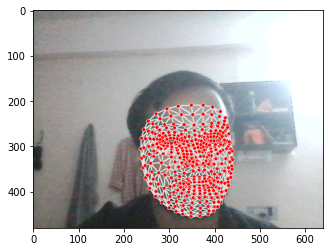

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose

[array([ 0.58741128,  0.70394307, -1.30549908,  0.98892367]),
 array([ 0.60855722,  0.61914527, -1.19445872,  0.98793262]),
 array([ 0.62876427,  0.61786771, -1.19516683,  0.98845351]),
 array([ 0.64733207,  0.61741215, -1.195701  ,  0.9875105 ]),
 array([ 0.53654814,  0.62232095, -1.23753273,  0.98819393]),
 array([ 0.5062021 ,  0.6247617 , -1.23732734,  0.98965377]),
 array([ 0.47900042,  0.62855852, -1.2381382 ,  0.99000305]),
 array([ 0.64599848,  0.64958757, -0.5245024 ,  0.98885608]),
 array([ 0.41683722,  0.67287123, -0.71235484,  0.99175489]),
 array([ 0.61265087,  0.79398334, -1.05134892,  0.98753184]),
 array([ 0.53642499,  0.79987663, -1.10698903,  0.98921865]),
 array([ 0.74700791,  1.02899802, -0.07975183,  0.86805677]),
 array([ 0.28316006,  1.01574552, -0.47187075,  0.88328338]),
 array([ 8.91789436e-01,  1.45551860e+00, -1.31833740e-03,  2.59427540e-02]),
 array([ 0.12669006,  1.43858504, -0.9898321 ,  0.12767175]),
 array([ 0.86622536,  1.69319689, -0.38629508,  0.0329

In [12]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
result_test = extract_keypoints(results)
len(result_test)

1662

In [14]:
np.save('0', result_test)
np.load('0.npy')

array([ 0.58741128,  0.70394307, -1.30549908, ...,  0.        ,
        0.        ,  0.        ])

**STAGE 4 FOR SETTING UP FOLDER FOR COLLECTION**

In [15]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
start_folder = 30

In [23]:
for action in actions:
    for sequence in range(1,no_sequences+1):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass
    
        

**Collecting keypoints**

In [24]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
                #print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(10)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [25]:

from sklearn.model_selection import train_test_split


In [26]:
from tensorflow.keras.utils import to_categorical

In [19]:
label_map = {label:num for num, label in enumerate(actions)}

In [20]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [27]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [28]:
np.array(sequences).shape

(90, 30, 1662)

In [29]:
np.array(labels).shape

(90,)

In [31]:
X = np.array(sequences)
y = to_categorical(labels).astype(int)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [35]:
X_test

array([[[ 6.30286694e-01,  5.54181218e-01, -7.98503041e-01, ...,
          3.71008575e-01,  3.67137522e-01, -1.81474201e-02],
        [ 6.28339410e-01,  5.54220021e-01, -7.04245687e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 6.26976013e-01,  5.55182219e-01, -7.30340123e-01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 6.34581447e-01,  5.46587110e-01, -7.56128609e-01, ...,
          3.59911025e-01,  3.85689110e-01, -9.74228606e-03],
        [ 6.34494185e-01,  5.47448695e-01, -7.41761923e-01, ...,
          3.51072073e-01,  3.90079528e-01, -1.43654123e-02],
        [ 6.34755373e-01,  5.48268735e-01, -7.33918369e-01, ...,
          3.51935893e-01,  3.92346025e-01, -1.35545125e-02]],

       [[ 6.26499772e-01,  5.53666830e-01, -7.31705546e-01, ...,
          3.48617196e-01,  3.90807360e-01, -2.97324955e-02],
        [ 6.20025992e-01,  5.53693593e-01, -6.73824668e-01, ...,
          0.00000000e+00,  0.00000000e

**building and training lstm**

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [37]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [38]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [40]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])
model.summary()

Epoch 1/2000
3/3 [==============================] - 4s 140ms/step - loss: 2.0285 - categorical_accuracy: 0.3059
Epoch 2/2000
3/3 [==============================] - 0s 127ms/step - loss: 5.6063 - categorical_accuracy: 0.2353
Epoch 3/2000
3/3 [==============================] - 0s 131ms/step - loss: 2.6630 - categorical_accuracy: 0.3412
Epoch 4/2000
3/3 [==============================] - 0s 131ms/step - loss: 2.3237 - categorical_accuracy: 0.4118
Epoch 5/2000
3/3 [==============================] - 0s 132ms/step - loss: 1.5496 - categorical_accuracy: 0.3529
Epoch 6/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.3373 - categorical_accuracy: 0.3647
Epoch 7/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.9886 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.5542 - categorical_accuracy: 0.2588
Epoch 9/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.4529 - categorical_accuracy:

3/3 [==============================] - 0s 127ms/step - loss: 0.2339 - categorical_accuracy: 0.9412
Epoch 74/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.1478 - categorical_accuracy: 0.9647
Epoch 75/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.1344 - categorical_accuracy: 0.9765
Epoch 76/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.1187 - categorical_accuracy: 0.9765
Epoch 77/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0794 - categorical_accuracy: 0.9765
Epoch 78/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0699 - categorical_accuracy: 0.9765
Epoch 79/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0762 - categorical_accuracy: 0.9765
Epoch 80/2000
3/3 [==============================] - 0s 142ms/step - loss: 0.1085 - categorical_accuracy: 0.9647
Epoch 81/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.1900 - categorical_accuracy: 0.92

3/3 [==============================] - 0s 128ms/step - loss: 0.0012 - categorical_accuracy: 1.0000
Epoch 146/2000
3/3 [==============================] - 0s 129ms/step - loss: 8.9895e-04 - categorical_accuracy: 1.0000
Epoch 147/2000
3/3 [==============================] - 0s 160ms/step - loss: 6.3321e-04 - categorical_accuracy: 1.0000
Epoch 148/2000
3/3 [==============================] - 0s 131ms/step - loss: 7.2274e-04 - categorical_accuracy: 1.0000
Epoch 149/2000
3/3 [==============================] - 0s 124ms/step - loss: 6.4207e-04 - categorical_accuracy: 1.0000
Epoch 150/2000
3/3 [==============================] - 0s 135ms/step - loss: 3.8398e-04 - categorical_accuracy: 1.0000
Epoch 151/2000
3/3 [==============================] - 0s 134ms/step - loss: 2.4173e-04 - categorical_accuracy: 1.0000
Epoch 152/2000
3/3 [==============================] - 0s 135ms/step - loss: 2.0069e-04 - categorical_accuracy: 1.0000
Epoch 153/2000
3/3 [==============================] - 0s 135ms/step - loss:

3/3 [==============================] - 0s 135ms/step - loss: 2.7831e-05 - categorical_accuracy: 1.0000
Epoch 215/2000
3/3 [==============================] - 0s 136ms/step - loss: 2.7426e-05 - categorical_accuracy: 1.0000
Epoch 216/2000
3/3 [==============================] - 0s 154ms/step - loss: 2.7135e-05 - categorical_accuracy: 1.0000
Epoch 217/2000
3/3 [==============================] - 0s 136ms/step - loss: 2.6738e-05 - categorical_accuracy: 1.0000
Epoch 218/2000
3/3 [==============================] - 0s 124ms/step - loss: 2.6392e-05 - categorical_accuracy: 1.0000
Epoch 219/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.6032e-05 - categorical_accuracy: 1.0000
Epoch 220/2000
3/3 [==============================] - 0s 123ms/step - loss: 2.5653e-05 - categorical_accuracy: 1.0000
Epoch 221/2000
3/3 [==============================] - 0s 124ms/step - loss: 2.5405e-05 - categorical_accuracy: 1.0000
Epoch 222/2000
3/3 [==============================] - 0s 119ms/step - l

3/3 [==============================] - 0s 121ms/step - loss: 1.3029e-05 - categorical_accuracy: 1.0000
Epoch 284/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.2926e-05 - categorical_accuracy: 1.0000
Epoch 285/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.2809e-05 - categorical_accuracy: 1.0000
Epoch 286/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.2686e-05 - categorical_accuracy: 1.0000
Epoch 287/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.2543e-05 - categorical_accuracy: 1.0000
Epoch 288/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.2456e-05 - categorical_accuracy: 1.0000
Epoch 289/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.2341e-05 - categorical_accuracy: 1.0000
Epoch 290/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.2236e-05 - categorical_accuracy: 1.0000
Epoch 291/2000
3/3 [==============================] - 0s 120ms/step - l

3/3 [==============================] - 0s 130ms/step - loss: 6.1132e-06 - categorical_accuracy: 1.0000
Epoch 353/2000
3/3 [==============================] - 0s 128ms/step - loss: 6.0627e-06 - categorical_accuracy: 1.0000
Epoch 354/2000
3/3 [==============================] - 0s 164ms/step - loss: 5.9996e-06 - categorical_accuracy: 1.0000
Epoch 355/2000
3/3 [==============================] - 0s 142ms/step - loss: 5.9547e-06 - categorical_accuracy: 1.0000
Epoch 356/2000
3/3 [==============================] - 0s 133ms/step - loss: 5.8944e-06 - categorical_accuracy: 1.0000
Epoch 357/2000
3/3 [==============================] - 0s 137ms/step - loss: 5.8509e-06 - categorical_accuracy: 1.0000
Epoch 358/2000
3/3 [==============================] - 0s 89ms/step - loss: 5.7977e-06 - categorical_accuracy: 1.0000
Epoch 359/2000
3/3 [==============================] - 0s 129ms/step - loss: 5.7458e-06 - categorical_accuracy: 1.0000
Epoch 360/2000
3/3 [==============================] - 0s 140ms/step - lo

3/3 [==============================] - 0s 134ms/step - loss: 3.4416e-06 - categorical_accuracy: 1.0000
Epoch 422/2000
3/3 [==============================] - 0s 133ms/step - loss: 3.4164e-06 - categorical_accuracy: 1.0000
Epoch 423/2000
3/3 [==============================] - 0s 128ms/step - loss: 3.3939e-06 - categorical_accuracy: 1.0000
Epoch 424/2000
3/3 [==============================] - 0s 126ms/step - loss: 3.3715e-06 - categorical_accuracy: 1.0000
Epoch 425/2000
3/3 [==============================] - 0s 131ms/step - loss: 3.3434e-06 - categorical_accuracy: 1.0000
Epoch 426/2000
3/3 [==============================] - 0s 125ms/step - loss: 3.3210e-06 - categorical_accuracy: 1.0000
Epoch 427/2000
3/3 [==============================] - 0s 122ms/step - loss: 3.3000e-06 - categorical_accuracy: 1.0000
Epoch 428/2000
3/3 [==============================] - 0s 131ms/step - loss: 3.2761e-06 - categorical_accuracy: 1.0000
Epoch 429/2000
3/3 [==============================] - 0s 123ms/step - l

3/3 [==============================] - 0s 127ms/step - loss: 2.2018e-06 - categorical_accuracy: 1.0000
Epoch 491/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.1892e-06 - categorical_accuracy: 1.0000
Epoch 492/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.1766e-06 - categorical_accuracy: 1.0000
Epoch 493/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.1626e-06 - categorical_accuracy: 1.0000
Epoch 494/2000
3/3 [==============================] - 0s 128ms/step - loss: 2.1472e-06 - categorical_accuracy: 1.0000
Epoch 495/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.1331e-06 - categorical_accuracy: 1.0000
Epoch 496/2000
3/3 [==============================] - 0s 125ms/step - loss: 2.1219e-06 - categorical_accuracy: 1.0000
Epoch 497/2000
3/3 [==============================] - 0s 120ms/step - loss: 2.1037e-06 - categorical_accuracy: 1.0000
Epoch 498/2000
3/3 [==============================] - 0s 125ms/step - l

3/3 [==============================] - 0s 131ms/step - loss: 1.5006e-06 - categorical_accuracy: 1.0000
Epoch 560/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.4908e-06 - categorical_accuracy: 1.0000
Epoch 561/2000
3/3 [==============================] - 0s 124ms/step - loss: 1.4880e-06 - categorical_accuracy: 1.0000
Epoch 562/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.4810e-06 - categorical_accuracy: 1.0000
Epoch 563/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.4740e-06 - categorical_accuracy: 1.0000
Epoch 564/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.4684e-06 - categorical_accuracy: 1.0000
Epoch 565/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.4614e-06 - categorical_accuracy: 1.0000
Epoch 566/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.4473e-06 - categorical_accuracy: 1.0000
Epoch 567/2000
3/3 [==============================] - 0s 127ms/step - l

3/3 [==============================] - 0s 113ms/step - loss: 1.0785e-06 - categorical_accuracy: 1.0000
Epoch 629/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0771e-06 - categorical_accuracy: 1.0000
Epoch 630/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.0687e-06 - categorical_accuracy: 1.0000
Epoch 631/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.0645e-06 - categorical_accuracy: 1.0000
Epoch 632/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.0645e-06 - categorical_accuracy: 1.0000
Epoch 633/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0546e-06 - categorical_accuracy: 1.0000
Epoch 634/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0532e-06 - categorical_accuracy: 1.0000
Epoch 635/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0448e-06 - categorical_accuracy: 1.0000
Epoch 636/2000
3/3 [==============================] - 0s 108ms/step - los

3/3 [==============================] - 0s 125ms/step - loss: 8.0080e-07 - categorical_accuracy: 1.0000
Epoch 698/2000
3/3 [==============================] - 0s 122ms/step - loss: 7.9800e-07 - categorical_accuracy: 1.0000
Epoch 699/2000
3/3 [==============================] - 0s 121ms/step - loss: 7.9379e-07 - categorical_accuracy: 1.0000
Epoch 700/2000
3/3 [==============================] - 0s 123ms/step - loss: 7.8818e-07 - categorical_accuracy: 1.0000
Epoch 701/2000
3/3 [==============================] - 0s 78ms/step - loss: 7.8538e-07 - categorical_accuracy: 1.0000
Epoch 702/2000
3/3 [==============================] - 0s 123ms/step - loss: 7.7696e-07 - categorical_accuracy: 1.0000
Epoch 703/2000
3/3 [==============================] - 0s 78ms/step - loss: 7.7696e-07 - categorical_accuracy: 1.0000
Epoch 704/2000
3/3 [==============================] - 0s 118ms/step - loss: 7.6995e-07 - categorical_accuracy: 1.0000
Epoch 705/2000
3/3 [==============================] - 0s 121ms/step - los

3/3 [==============================] - 0s 121ms/step - loss: 6.1428e-07 - categorical_accuracy: 1.0000
Epoch 767/2000
3/3 [==============================] - 0s 122ms/step - loss: 6.1428e-07 - categorical_accuracy: 1.0000
Epoch 768/2000
3/3 [==============================] - 0s 123ms/step - loss: 6.1287e-07 - categorical_accuracy: 1.0000
Epoch 769/2000
3/3 [==============================] - 0s 122ms/step - loss: 6.0726e-07 - categorical_accuracy: 1.0000
Epoch 770/2000
3/3 [==============================] - 0s 118ms/step - loss: 6.0586e-07 - categorical_accuracy: 1.0000
Epoch 771/2000
3/3 [==============================] - 0s 125ms/step - loss: 6.0446e-07 - categorical_accuracy: 1.0000
Epoch 772/2000
3/3 [==============================] - 0s 121ms/step - loss: 5.9885e-07 - categorical_accuracy: 1.0000
Epoch 773/2000
3/3 [==============================] - 0s 126ms/step - loss: 5.9745e-07 - categorical_accuracy: 1.0000
Epoch 774/2000
3/3 [==============================] - 0s 124ms/step - l

3/3 [==============================] - 0s 123ms/step - loss: 4.8104e-07 - categorical_accuracy: 1.0000
Epoch 836/2000
3/3 [==============================] - 0s 119ms/step - loss: 4.8104e-07 - categorical_accuracy: 1.0000
Epoch 837/2000
3/3 [==============================] - 0s 78ms/step - loss: 4.7964e-07 - categorical_accuracy: 1.0000
Epoch 838/2000
3/3 [==============================] - 0s 120ms/step - loss: 4.7684e-07 - categorical_accuracy: 1.0000
Epoch 839/2000
3/3 [==============================] - 0s 122ms/step - loss: 4.7684e-07 - categorical_accuracy: 1.0000
Epoch 840/2000
3/3 [==============================] - 0s 121ms/step - loss: 4.7684e-07 - categorical_accuracy: 1.0000
Epoch 841/2000
3/3 [==============================] - 0s 122ms/step - loss: 4.7403e-07 - categorical_accuracy: 1.0000
Epoch 842/2000
3/3 [==============================] - 0s 123ms/step - loss: 4.7403e-07 - categorical_accuracy: 1.0000
Epoch 843/2000
3/3 [==============================] - 0s 121ms/step - lo

3/3 [==============================] - 0s 97ms/step - loss: 3.9269e-07 - categorical_accuracy: 1.0000
Epoch 905/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.9269e-07 - categorical_accuracy: 1.0000
Epoch 906/2000
3/3 [==============================] - 0s 122ms/step - loss: 3.9129e-07 - categorical_accuracy: 1.0000
Epoch 907/2000
3/3 [==============================] - 0s 126ms/step - loss: 3.9129e-07 - categorical_accuracy: 1.0000
Epoch 908/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.8988e-07 - categorical_accuracy: 1.0000
Epoch 909/2000
3/3 [==============================] - 0s 122ms/step - loss: 3.8848e-07 - categorical_accuracy: 1.0000
Epoch 910/2000
3/3 [==============================] - 0s 125ms/step - loss: 3.8568e-07 - categorical_accuracy: 1.0000
Epoch 911/2000
3/3 [==============================] - 0s 126ms/step - loss: 3.8287e-07 - categorical_accuracy: 1.0000
Epoch 912/2000
3/3 [==============================] - 0s 122ms/step - lo

3/3 [==============================] - 0s 119ms/step - loss: 3.2677e-07 - categorical_accuracy: 1.0000
Epoch 974/2000
3/3 [==============================] - 0s 121ms/step - loss: 3.2537e-07 - categorical_accuracy: 1.0000
Epoch 975/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.2537e-07 - categorical_accuracy: 1.0000
Epoch 976/2000
3/3 [==============================] - 0s 135ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 977/2000
3/3 [==============================] - 0s 133ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 978/2000
3/3 [==============================] - 0s 124ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 979/2000
3/3 [==============================] - 0s 123ms/step - loss: 3.2257e-07 - categorical_accuracy: 1.0000
Epoch 980/2000
3/3 [==============================] - 0s 124ms/step - loss: 3.2116e-07 - categorical_accuracy: 1.0000
Epoch 981/2000
3/3 [==============================] - 0s 127ms/step - l

3/3 [==============================] - 0s 104ms/step - loss: 2.6647e-07 - categorical_accuracy: 1.0000
Epoch 1043/2000
3/3 [==============================] - 0s 95ms/step - loss: 2.6647e-07 - categorical_accuracy: 1.0000
Epoch 1044/2000
3/3 [==============================] - 0s 90ms/step - loss: 2.6647e-07 - categorical_accuracy: 1.0000
Epoch 1045/2000
3/3 [==============================] - 0s 91ms/step - loss: 2.6507e-07 - categorical_accuracy: 1.0000
Epoch 1046/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.6366e-07 - categorical_accuracy: 1.0000
Epoch 1047/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.6366e-07 - categorical_accuracy: 1.0000
Epoch 1048/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.6366e-07 - categorical_accuracy: 1.0000
Epoch 1049/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.6366e-07 - categorical_accuracy: 1.0000
Epoch 1050/2000
3/3 [==============================] - 0s 92ms/step -

3/3 [==============================] - 0s 108ms/step - loss: 2.2580e-07 - categorical_accuracy: 1.0000
Epoch 1112/2000
3/3 [==============================] - 0s 112ms/step - loss: 2.2439e-07 - categorical_accuracy: 1.0000
Epoch 1113/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.2439e-07 - categorical_accuracy: 1.0000
Epoch 1114/2000
3/3 [==============================] - 0s 97ms/step - loss: 2.2439e-07 - categorical_accuracy: 1.0000
Epoch 1115/2000
3/3 [==============================] - 0s 99ms/step - loss: 2.2439e-07 - categorical_accuracy: 1.0000
Epoch 1116/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.2439e-07 - categorical_accuracy: 1.0000
Epoch 1117/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.2439e-07 - categorical_accuracy: 1.0000
Epoch 1118/2000
3/3 [==============================] - 0s 93ms/step - loss: 2.2299e-07 - categorical_accuracy: 1.0000
Epoch 1119/2000
3/3 [==============================] - 0s 105ms/step 

3/3 [==============================] - 0s 116ms/step - loss: 1.9775e-07 - categorical_accuracy: 1.0000
Epoch 1181/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.9634e-07 - categorical_accuracy: 1.0000
Epoch 1182/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.9494e-07 - categorical_accuracy: 1.0000
Epoch 1183/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.9494e-07 - categorical_accuracy: 1.0000
Epoch 1184/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.9494e-07 - categorical_accuracy: 1.0000
Epoch 1185/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.9634e-07 - categorical_accuracy: 1.0000
Epoch 1186/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.9494e-07 - categorical_accuracy: 1.0000
Epoch 1187/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.9354e-07 - categorical_accuracy: 1.0000
Epoch 1188/2000
3/3 [==============================] - 0s 123ms/s

3/3 [==============================] - 0s 118ms/step - loss: 1.6970e-07 - categorical_accuracy: 1.0000
Epoch 1250/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 1251/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 1252/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.6830e-07 - categorical_accuracy: 1.0000
Epoch 1253/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 1254/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 1255/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 1256/2000
3/3 [==============================] - 0s 126ms/step - loss: 1.6689e-07 - categorical_accuracy: 1.0000
Epoch 1257/2000
3/3 [==============================] - 0s 130ms/

3/3 [==============================] - 0s 126ms/step - loss: 1.4726e-07 - categorical_accuracy: 1.0000
Epoch 1319/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.4586e-07 - categorical_accuracy: 1.0000
Epoch 1320/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.4445e-07 - categorical_accuracy: 1.0000
Epoch 1321/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.4445e-07 - categorical_accuracy: 1.0000
Epoch 1322/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.4445e-07 - categorical_accuracy: 1.0000
Epoch 1323/2000
3/3 [==============================] - 0s 76ms/step - loss: 1.4445e-07 - categorical_accuracy: 1.0000
Epoch 1324/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.4305e-07 - categorical_accuracy: 1.0000
Epoch 1325/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.4165e-07 - categorical_accuracy: 1.0000
Epoch 1326/2000
3/3 [==============================] - 0s 116ms/s

3/3 [==============================] - 0s 138ms/step - loss: 1.2342e-07 - categorical_accuracy: 1.0000
Epoch 1388/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.2342e-07 - categorical_accuracy: 1.0000
Epoch 1389/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.2342e-07 - categorical_accuracy: 1.0000
Epoch 1390/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.2342e-07 - categorical_accuracy: 1.0000
Epoch 1391/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.2342e-07 - categorical_accuracy: 1.0000
Epoch 1392/2000
3/3 [==============================] - 0s 136ms/step - loss: 1.2342e-07 - categorical_accuracy: 1.0000
Epoch 1393/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.2201e-07 - categorical_accuracy: 1.0000
Epoch 1394/2000
3/3 [==============================] - 0s 154ms/step - loss: 1.2061e-07 - categorical_accuracy: 1.0000
Epoch 1395/2000
3/3 [==============================] - 0s 136ms/

Epoch 1456/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.0659e-07 - categorical_accuracy: 1.0000
Epoch 1457/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.0518e-07 - categorical_accuracy: 1.0000
Epoch 1458/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.0518e-07 - categorical_accuracy: 1.0000
Epoch 1459/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0518e-07 - categorical_accuracy: 1.0000
Epoch 1460/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.0518e-07 - categorical_accuracy: 1.0000
Epoch 1461/2000
3/3 [==============================] - 0s 141ms/step - loss: 1.0378e-07 - categorical_accuracy: 1.0000
Epoch 1462/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.0378e-07 - categorical_accuracy: 1.0000
Epoch 1463/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.0378e-07 - categorical_accuracy: 1.0000
Epoch 1464/2000
3/3 [============================

3/3 [==============================] - 0s 132ms/step - loss: 9.2562e-08 - categorical_accuracy: 1.0000
Epoch 1525/2000
3/3 [==============================] - 0s 136ms/step - loss: 9.2562e-08 - categorical_accuracy: 1.0000
Epoch 1526/2000
3/3 [==============================] - 0s 138ms/step - loss: 8.9758e-08 - categorical_accuracy: 1.0000
Epoch 1527/2000
3/3 [==============================] - 0s 138ms/step - loss: 8.9758e-08 - categorical_accuracy: 1.0000
Epoch 1528/2000
3/3 [==============================] - 0s 132ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1529/2000
3/3 [==============================] - 0s 137ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1530/2000
3/3 [==============================] - 0s 144ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1531/2000
3/3 [==============================] - 0s 137ms/step - loss: 8.8355e-08 - categorical_accuracy: 1.0000
Epoch 1532/2000
3/3 [==============================] - 0s 137ms/

3/3 [==============================] - 0s 111ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1594/2000
3/3 [==============================] - 0s 131ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1595/2000
3/3 [==============================] - 0s 107ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1596/2000
3/3 [==============================] - 0s 129ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1597/2000
3/3 [==============================] - 0s 131ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1598/2000
3/3 [==============================] - 0s 109ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1599/2000
3/3 [==============================] - 0s 116ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1600/2000
3/3 [==============================] - 0s 102ms/step - loss: 7.4330e-08 - categorical_accuracy: 1.0000
Epoch 1601/2000
3/3 [==============================] - 0s 102ms/

3/3 [==============================] - 0s 136ms/step - loss: 6.0306e-08 - categorical_accuracy: 1.0000
Epoch 1663/2000
3/3 [==============================] - 0s 136ms/step - loss: 6.0306e-08 - categorical_accuracy: 1.0000
Epoch 1664/2000
3/3 [==============================] - 0s 133ms/step - loss: 5.8903e-08 - categorical_accuracy: 1.0000
Epoch 1665/2000
3/3 [==============================] - 0s 137ms/step - loss: 5.8903e-08 - categorical_accuracy: 1.0000
Epoch 1666/2000
3/3 [==============================] - 0s 138ms/step - loss: 5.8903e-08 - categorical_accuracy: 1.0000
Epoch 1667/2000
3/3 [==============================] - 0s 145ms/step - loss: 5.8903e-08 - categorical_accuracy: 1.0000
Epoch 1668/2000
3/3 [==============================] - 0s 143ms/step - loss: 5.8903e-08 - categorical_accuracy: 1.0000
Epoch 1669/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.8903e-08 - categorical_accuracy: 1.0000
Epoch 1670/2000
3/3 [==============================] - 0s 147ms/

Epoch 1731/2000
3/3 [==============================] - 0s 120ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 1732/2000
3/3 [==============================] - 0s 136ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 1733/2000
3/3 [==============================] - 0s 131ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 1734/2000
3/3 [==============================] - 0s 132ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 1735/2000
3/3 [==============================] - 0s 136ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 1736/2000
3/3 [==============================] - 0s 154ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 1737/2000
3/3 [==============================] - 0s 132ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 1738/2000
3/3 [==============================] - 0s 137ms/step - loss: 5.1891e-08 - categorical_accuracy: 1.0000
Epoch 1739/2000
3/3 [===========================

3/3 [==============================] - 0s 101ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1800/2000
3/3 [==============================] - 0s 109ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1801/2000
3/3 [==============================] - 0s 113ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1802/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1803/2000
3/3 [==============================] - 0s 116ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1804/2000
3/3 [==============================] - 0s 112ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1805/2000
3/3 [==============================] - 0s 97ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1806/2000
3/3 [==============================] - 0s 120ms/step - loss: 4.4879e-08 - categorical_accuracy: 1.0000
Epoch 1807/2000
3/3 [==============================] - 0s 108ms/s

Epoch 1868/2000
3/3 [==============================] - 0s 137ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1869/2000
3/3 [==============================] - 0s 132ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1870/2000
3/3 [==============================] - 0s 131ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1871/2000
3/3 [==============================] - 0s 133ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1872/2000
3/3 [==============================] - 0s 136ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1873/2000
3/3 [==============================] - 0s 132ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1874/2000
3/3 [==============================] - 0s 138ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1875/2000
3/3 [==============================] - 0s 137ms/step - loss: 4.0671e-08 - categorical_accuracy: 1.0000
Epoch 1876/2000
3/3 [===========================

3/3 [==============================] - 0s 137ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1937/2000
3/3 [==============================] - 0s 131ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1938/2000
3/3 [==============================] - 0s 131ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1939/2000
3/3 [==============================] - 0s 138ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1940/2000
3/3 [==============================] - 0s 136ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1941/2000
3/3 [==============================] - 0s 131ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1942/2000
3/3 [==============================] - 0s 137ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1943/2000
3/3 [==============================] - 0s 131ms/step - loss: 3.3659e-08 - categorical_accuracy: 1.0000
Epoch 1944/2000
3/3 [==============================] - 0s 138ms/

 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trainable params: 0
_________________________________________________________________


In [41]:
res = model.predict(X_test)

1/1 [==============================] - 0s 494ms/step


In [42]:
actions[np.argmax(res[4])]

'iloveyou'

In [43]:
actions[np.argmax(y_test[4])]

'iloveyou'

In [45]:
model.save('action.h5')

In [46]:
model.load_weights('action.h5')

**Evaluating the matrix**

In [47]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [48]:
yhat = model.predict(X_test)

1/1 [==============================] - 0s 63ms/step


In [49]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [50]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [51]:
accuracy_score(ytrue, yhat)

1.0

**Test in realtime**

In [52]:
from scipy import stats

In [53]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

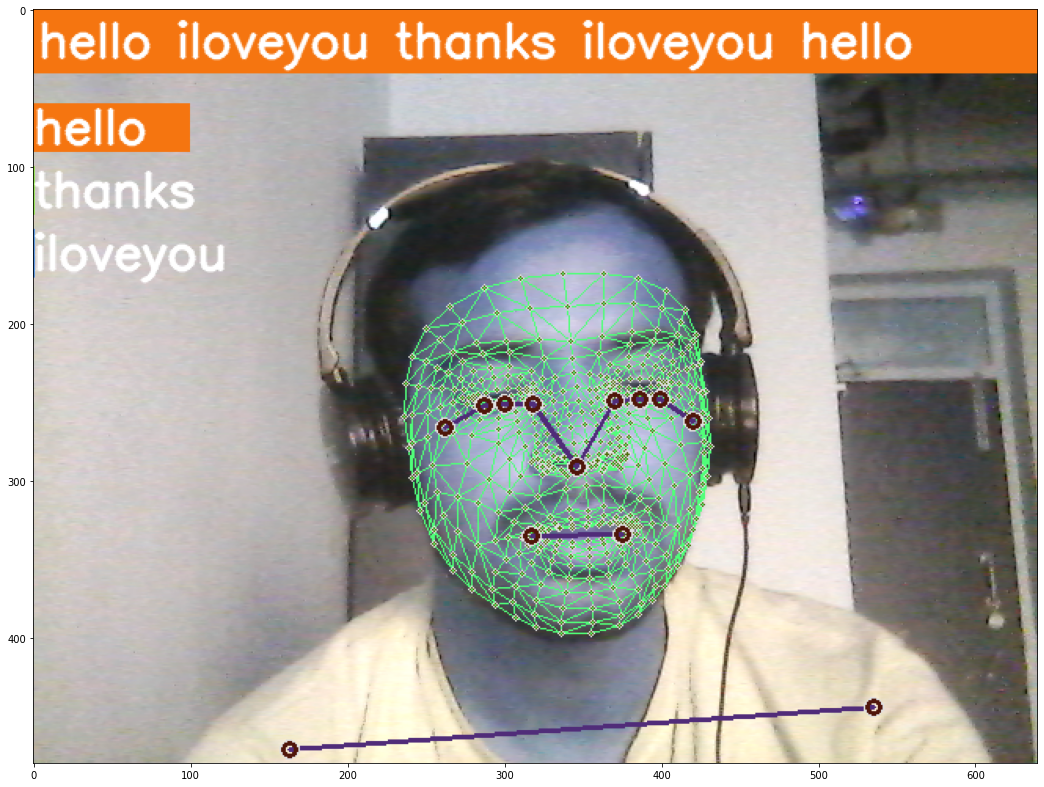

In [56]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

In [1]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                    
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

**CONVERTING TEXT TO SPEECH**

In [57]:
!pip install playsound

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for playsound: filename=playsound-1.3.0-py3-none-any.whl size=7035 sha256=f9b51c1d01023e69a56003a82b94ae189ccd0f7707f62d1c43669ccf761bae26
  Stored in directory: c:\users\acer\appdata\local\pip\cache\wheels\90\89\ed\2d643f4226fc8c7c9156fc28abd8051e2d2c0de37ae51ac45c
Successfully built playsound


In [59]:
import playsound as ps

In [63]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                    if(actions[np.argmax(res)]=='hello'):
                        ps.playsound("F:\\COURSES\\Computer_vision\\Sign_languages\\sound\\Hello.mp3")
                    elif(actions[np.argmax(res)]=='thanks'):
                        ps.playsound("F:\\COURSES\\Computer_vision\\Sign_languages\\sound\\Borat.mp3")
                    else:
                        ps.playsound("F:\\COURSES\\Computer_vision\\Sign_languages\\sound\\I love you Human Voice.mp3")
                    
            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti


    Error 259 for command:
        play "F:\COURSES\Computer_vision\Sign_languages\sound\Hello.mp3" wait
    The driver cannot recognize the specified command parameter.


hello


PlaysoundException: 
    Error 259 for command:
        play "F:\COURSES\Computer_vision\Sign_languages\sound\Hello.mp3" wait
    The driver cannot recognize the specified command parameter.